# Credit Card Default Predictive Modelling

# Content
* Introduction
* Data Pipeline
* Preparation
* Exploratory Data Analysis
* Modelling & Evaluation
* Conclusions
* Reference

# Introduction

This kernel is to practice data analysis and machine learning techniques. The aim is to predict default of credit card clients using several classification models and compare the performances accordingly.

After that, the model with best performance will be chosen and optimized with feature engineering and parameter tuning.

# Preparation

### About the dataset

The dataset is from the UCI Machine Learning Repository, which contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables, including 24 predictor variables and 1 target variable, as following:
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* <font color = 'blue'>default.payment.next.month: Default payment (1=yes, 0=no)   — Target Variable</font>

In [1]:
# Loading packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# Exploratory Data Analysis

Check the first 5 rows of the dataset 

In [2]:
# import csv
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Check the number of rows and columns.

In [3]:
df.shape

(30000, 25)

Check whether there is missing data in each columns.

In [4]:
# Checking missing data
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Check the summary for each feature (column).

In [5]:
# Check the summary for each feature
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


The target variable is "default.payment.next.month". There are 24 predictors. 

First, check the data imbalance for the target, "Default" and "No Default" classes.

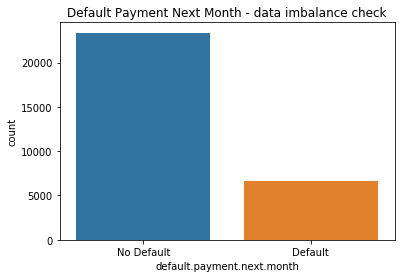

In [6]:
df['default.payment.next.month'].value_counts()
plt.title('Default Payment Next Month - data imbalance check')
ax1 = sns.countplot(x= 'default.payment.next.month', data = df)
ax1.set_xticklabels(['No Default','Default'])
plt.show()

Basically this is a binary classification problem. The percentage of "Default" class is about <font color = 'blue'>22%</font>, so the data imbalance is not significant. 

Then, let's take a look at how different predictors affect our target.

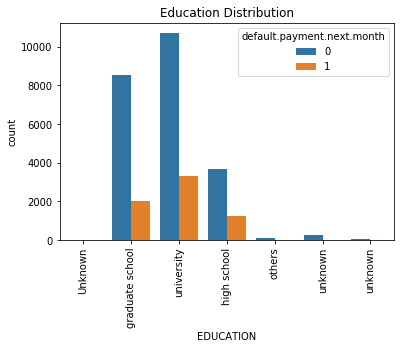

In [7]:
# Education Distribution
plt.title('Education Distribution')
ax2 = sns.countplot(x= 'EDUCATION', hue = 'default.payment.next.month', data = df)
ax2.set_xticklabels(['Unknown','graduate school','university','high school','others','unknown','unknown'],rotation = 90)
plt.show()

From above plot, we can see that most of the defaulters have the degree of graduate/university/high school. Among them, clients who have university degree are more likely to default than others.

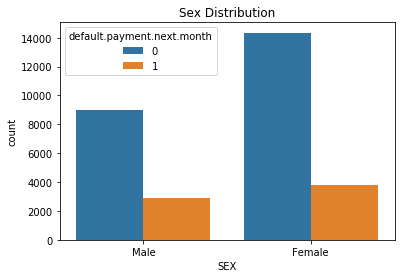

In [8]:
# SEX distribution
plt.title('Sex Distribution')
ax3 = sns.countplot(x= 'SEX', hue = 'default.payment.next.month', data = df)
ax3.set_xticklabels(['Male','Female'])
plt.show()

Female has more probability of default than male.

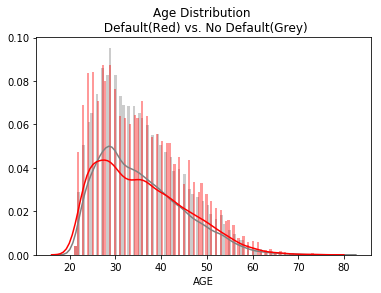

In [9]:
# Age Distribution
plt.title('Age Distribution \n Default(Red) vs. No Default(Grey)')
agedist0 = df[df['default.payment.next.month']==0]['AGE']
agedist1 = df[df['default.payment.next.month']==1]['AGE']
sns.distplot(agedist0, bins = 100, color = 'grey')
sns.distplot(agedist1, bins = 100, color = 'red')
plt.show()

As the age increases to 30, the probability of default increases. Meanwhile, when clients are over 30, the probability decreases when aging.

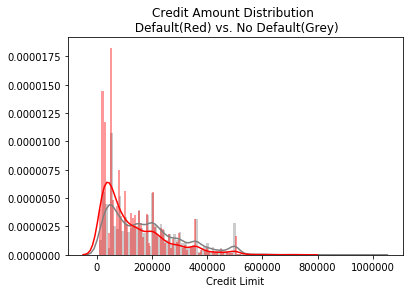

In [10]:
# Credit Amount Distribution
plt.title('Credit Amount Distribution \n Default(Red) vs. No Default(Grey)')
cadist0 = df[df['default.payment.next.month']==0]['LIMIT_BAL']
cadist1 = df[df['default.payment.next.month']==1]['LIMIT_BAL']
sns.distplot(cadist0, bins = 100, color = 'grey')
sns.distplot(cadist1, bins = 100, color = 'red')
plt.xlabel('Credit Limit')
plt.show()

Clients with lower amount tend to default. Especially those with credit amount around 50000 default most.

# Modelling & Evaluation

### Modelling prepration

First, divide the features into predictor (X) and target(Y) before fitting the models.

In [11]:
# Define predictor and target variables with X and Y
X = df.columns[:24]
Y = df.columns[-1]

Then, split the dataset into train and test sets.

In [12]:
# training and test dataset split, leaving 30% as test set
x_train, x_test, y_train, y_test = train_test_split(df[X],df[Y], 
                                                    test_size = .3, shuffle = True, random_state = 0)

In [13]:
# Check splitted data for train and test sets respectively
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 24)
(9000, 24)
(21000,)
(9000,)


### Logistic Regression

In [14]:
clfLR = LogisticRegression(solver = 'lbfgs',
                           max_iter = 500,
                          random_state = 0)

clfLR.fit(x_train,y_train)

predLR = clfLR.predict(x_test)

In [15]:
# Cross Validation
cross_val_score_LR = cross_val_score(clfLR, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LR.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predLR).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predLR).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predLR).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predLR).round(2))

cross_val_score:  0.78
precision score is  1.0
recall_score is  0.0005
f1 score is  0.001
ROC AUC is  0.5


### Support Vector Machine

In [16]:
clfSVC = SVC(kernel = 'rbf',
             gamma = 'scale',
                random_state = 0)

clfSVC.fit(x_train,y_train)

predSVC = clfSVC.predict(x_test)

In [17]:
# Cross Validation
cross_val_score_SVC = cross_val_score(clfSVC, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_SVC.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predSVC).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predSVC).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predSVC).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predSVC).round(2))

cross_val_score:  0.78
precision score is  0.55
recall_score is  0.0165
f1 score is  0.032
ROC AUC is  0.51


### K Nearest Neighbors

In [18]:
clfKNN = KNeighborsClassifier(n_neighbors = 3)
clfKNN.fit(x_train,y_train)

predKNN = clfKNN.predict(x_test)

In [19]:
# Cross Validation
cross_val_score_KNN = cross_val_score(clfKNN, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_KNN.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predKNN).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predKNN).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predKNN).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predKNN).round(2))

cross_val_score:  0.72
precision score is  0.32
recall_score is  0.216
f1 score is  0.258
ROC AUC is  0.54


### Random Forest

In [20]:
clfRF = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 100,
                              verbose = False,
                              random_state = 0)

clfRF.fit(x_train,y_train)

predRF = clfRF.predict(x_test)

In [21]:
# Cross Validation
cross_val_score_RF = cross_val_score(clfRF, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_RF.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predRF).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predRF).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predRF).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predRF).round(2))

cross_val_score:  0.82
precision score is  0.65
recall_score is  0.3639
f1 score is  0.467
ROC AUC is  0.66


### XGBoost

In [22]:
clfXGB = xgb.XGBClassifier()
clfXGB.fit(x_train,y_train)
predXGB = clfXGB.predict(x_test)

In [23]:
# Cross Validation
cross_val_score_XGB = cross_val_score(clfXGB, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_XGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predXGB).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predXGB).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predXGB).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predXGB).round(2))

cross_val_score:  0.83
precision score is  0.68
recall_score is  0.3634
f1 score is  0.474
ROC AUC is  0.66


### LightGBM

In [24]:
clfLGB = LGBMClassifier(n_estimators = 100,
                           learning_rate = .2,
                           random_state = 0)

clfLGB.fit(x_train,y_train)

predLGB = clfLGB.predict(x_test)

In [25]:
# Cross Validation
cross_val_score_LGB = cross_val_score(clfLGB, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predLGB).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predLGB).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predLGB).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predLGB).round(2))

cross_val_score:  0.81
precision score is  0.66
recall_score is  0.3603
f1 score is  0.466
ROC AUC is  0.65


### CatBoostClassifier

In [26]:
clfCB = CatBoostClassifier(iterations = 100,
                           learning_rate = .2,
                           depth = 5,
                           eval_metric = 'AUC',
                           random_seed = 0)

clfCB.fit(x_train,y_train)

predCB = clfCB.predict(x_test)

0:	total: 103ms	remaining: 10.2s
1:	total: 134ms	remaining: 6.56s
2:	total: 158ms	remaining: 5.12s
3:	total: 187ms	remaining: 4.49s
4:	total: 217ms	remaining: 4.12s
5:	total: 246ms	remaining: 3.85s
6:	total: 276ms	remaining: 3.67s
7:	total: 311ms	remaining: 3.58s
8:	total: 349ms	remaining: 3.52s
9:	total: 379ms	remaining: 3.41s
10:	total: 405ms	remaining: 3.27s
11:	total: 434ms	remaining: 3.18s
12:	total: 464ms	remaining: 3.1s
13:	total: 492ms	remaining: 3.02s
14:	total: 537ms	remaining: 3.04s
15:	total: 576ms	remaining: 3.02s
16:	total: 611ms	remaining: 2.98s
17:	total: 645ms	remaining: 2.94s
18:	total: 685ms	remaining: 2.92s
19:	total: 721ms	remaining: 2.88s
20:	total: 784ms	remaining: 2.95s
21:	total: 819ms	remaining: 2.9s
22:	total: 849ms	remaining: 2.84s
23:	total: 879ms	remaining: 2.78s
24:	total: 908ms	remaining: 2.72s
25:	total: 936ms	remaining: 2.67s
26:	total: 967ms	remaining: 2.61s
27:	total: 1.03s	remaining: 2.64s
28:	total: 1.15s	remaining: 2.81s
29:	total: 1.21s	remaining

In [27]:
# Cross Validation
cross_val_score_CB = cross_val_score(clfCB, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_CB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predCB).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predCB).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predCB).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predCB).round(2))

0:	total: 24.2ms	remaining: 2.4s
1:	total: 46.2ms	remaining: 2.26s
2:	total: 68.3ms	remaining: 2.21s
3:	total: 94.9ms	remaining: 2.28s
4:	total: 120ms	remaining: 2.27s
5:	total: 142ms	remaining: 2.22s
6:	total: 165ms	remaining: 2.2s
7:	total: 200ms	remaining: 2.3s
8:	total: 240ms	remaining: 2.43s
9:	total: 275ms	remaining: 2.47s
10:	total: 306ms	remaining: 2.48s
11:	total: 336ms	remaining: 2.46s
12:	total: 363ms	remaining: 2.43s
13:	total: 395ms	remaining: 2.43s
14:	total: 430ms	remaining: 2.44s
15:	total: 477ms	remaining: 2.5s
16:	total: 512ms	remaining: 2.5s
17:	total: 537ms	remaining: 2.45s
18:	total: 564ms	remaining: 2.4s
19:	total: 605ms	remaining: 2.42s
20:	total: 629ms	remaining: 2.37s
21:	total: 653ms	remaining: 2.31s
22:	total: 726ms	remaining: 2.43s
23:	total: 751ms	remaining: 2.38s
24:	total: 776ms	remaining: 2.33s
25:	total: 802ms	remaining: 2.28s
26:	total: 824ms	remaining: 2.23s
27:	total: 845ms	remaining: 2.17s
28:	total: 868ms	remaining: 2.12s
29:	total: 913ms	remaining

44:	total: 1.59s	remaining: 1.94s
45:	total: 1.62s	remaining: 1.9s
46:	total: 1.64s	remaining: 1.85s
47:	total: 1.67s	remaining: 1.81s
48:	total: 1.69s	remaining: 1.76s
49:	total: 1.72s	remaining: 1.72s
50:	total: 1.75s	remaining: 1.68s
51:	total: 1.77s	remaining: 1.64s
52:	total: 1.8s	remaining: 1.6s
53:	total: 1.83s	remaining: 1.56s
54:	total: 1.85s	remaining: 1.52s
55:	total: 1.88s	remaining: 1.47s
56:	total: 1.91s	remaining: 1.44s
57:	total: 1.93s	remaining: 1.4s
58:	total: 1.96s	remaining: 1.36s
59:	total: 1.98s	remaining: 1.32s
60:	total: 2s	remaining: 1.28s
61:	total: 2.03s	remaining: 1.24s
62:	total: 2.05s	remaining: 1.21s
63:	total: 2.08s	remaining: 1.17s
64:	total: 2.11s	remaining: 1.13s
65:	total: 2.13s	remaining: 1.09s
66:	total: 2.15s	remaining: 1.06s
67:	total: 2.18s	remaining: 1.02s
68:	total: 2.25s	remaining: 1.01s
69:	total: 2.28s	remaining: 978ms
70:	total: 2.31s	remaining: 942ms
71:	total: 2.33s	remaining: 907ms
72:	total: 2.36s	remaining: 873ms
73:	total: 2.38s	rema

93:	total: 3.04s	remaining: 194ms
94:	total: 3.06s	remaining: 161ms
95:	total: 3.09s	remaining: 129ms
96:	total: 3.12s	remaining: 96.4ms
97:	total: 3.14s	remaining: 64.2ms
98:	total: 3.17s	remaining: 32ms
99:	total: 3.32s	remaining: 0us
0:	total: 28.6ms	remaining: 2.83s
1:	total: 59.2ms	remaining: 2.9s
2:	total: 83.4ms	remaining: 2.7s
3:	total: 112ms	remaining: 2.7s
4:	total: 140ms	remaining: 2.66s
5:	total: 165ms	remaining: 2.59s
6:	total: 196ms	remaining: 2.61s
7:	total: 219ms	remaining: 2.52s
8:	total: 241ms	remaining: 2.43s
9:	total: 270ms	remaining: 2.43s
10:	total: 293ms	remaining: 2.37s
11:	total: 311ms	remaining: 2.28s
12:	total: 336ms	remaining: 2.25s
13:	total: 360ms	remaining: 2.21s
14:	total: 389ms	remaining: 2.21s
15:	total: 477ms	remaining: 2.5s
16:	total: 509ms	remaining: 2.48s
17:	total: 552ms	remaining: 2.51s
18:	total: 581ms	remaining: 2.48s
19:	total: 603ms	remaining: 2.41s
20:	total: 628ms	remaining: 2.36s
21:	total: 654ms	remaining: 2.32s
22:	total: 675ms	remaining

37:	total: 1.21s	remaining: 1.98s
38:	total: 1.24s	remaining: 1.93s
39:	total: 1.27s	remaining: 1.9s
40:	total: 1.29s	remaining: 1.86s
41:	total: 1.33s	remaining: 1.83s
42:	total: 1.35s	remaining: 1.79s
43:	total: 1.39s	remaining: 1.76s
44:	total: 1.45s	remaining: 1.77s
45:	total: 1.47s	remaining: 1.73s
46:	total: 1.5s	remaining: 1.69s
47:	total: 1.54s	remaining: 1.66s
48:	total: 1.56s	remaining: 1.62s
49:	total: 1.59s	remaining: 1.59s
50:	total: 1.61s	remaining: 1.55s
51:	total: 1.64s	remaining: 1.51s
52:	total: 1.66s	remaining: 1.48s
53:	total: 1.7s	remaining: 1.45s
54:	total: 1.73s	remaining: 1.41s
55:	total: 1.75s	remaining: 1.38s
56:	total: 1.78s	remaining: 1.34s
57:	total: 1.84s	remaining: 1.33s
58:	total: 1.89s	remaining: 1.31s
59:	total: 1.92s	remaining: 1.28s
60:	total: 1.94s	remaining: 1.24s
61:	total: 1.98s	remaining: 1.21s
62:	total: 2s	remaining: 1.17s
63:	total: 2.03s	remaining: 1.14s
64:	total: 2.06s	remaining: 1.11s
65:	total: 2.09s	remaining: 1.08s
66:	total: 2.12s	rem

80:	total: 2.96s	remaining: 695ms
81:	total: 2.99s	remaining: 657ms
82:	total: 3.05s	remaining: 624ms
83:	total: 3.07s	remaining: 585ms
84:	total: 3.1s	remaining: 546ms
85:	total: 3.12s	remaining: 508ms
86:	total: 3.14s	remaining: 470ms
87:	total: 3.17s	remaining: 432ms
88:	total: 3.2s	remaining: 396ms
89:	total: 3.22s	remaining: 358ms
90:	total: 3.25s	remaining: 321ms
91:	total: 3.27s	remaining: 285ms
92:	total: 3.3s	remaining: 249ms
93:	total: 3.33s	remaining: 212ms
94:	total: 3.35s	remaining: 176ms
95:	total: 3.37s	remaining: 141ms
96:	total: 3.4s	remaining: 105ms
97:	total: 3.43s	remaining: 70ms
98:	total: 3.45s	remaining: 34.9ms
99:	total: 3.47s	remaining: 0us
cross_val_score:  0.83
precision score is  0.67
recall_score is  0.3686
f1 score is  0.477
ROC AUC is  0.66


### Confusion Matrix

<Figure size 432x288 with 0 Axes>

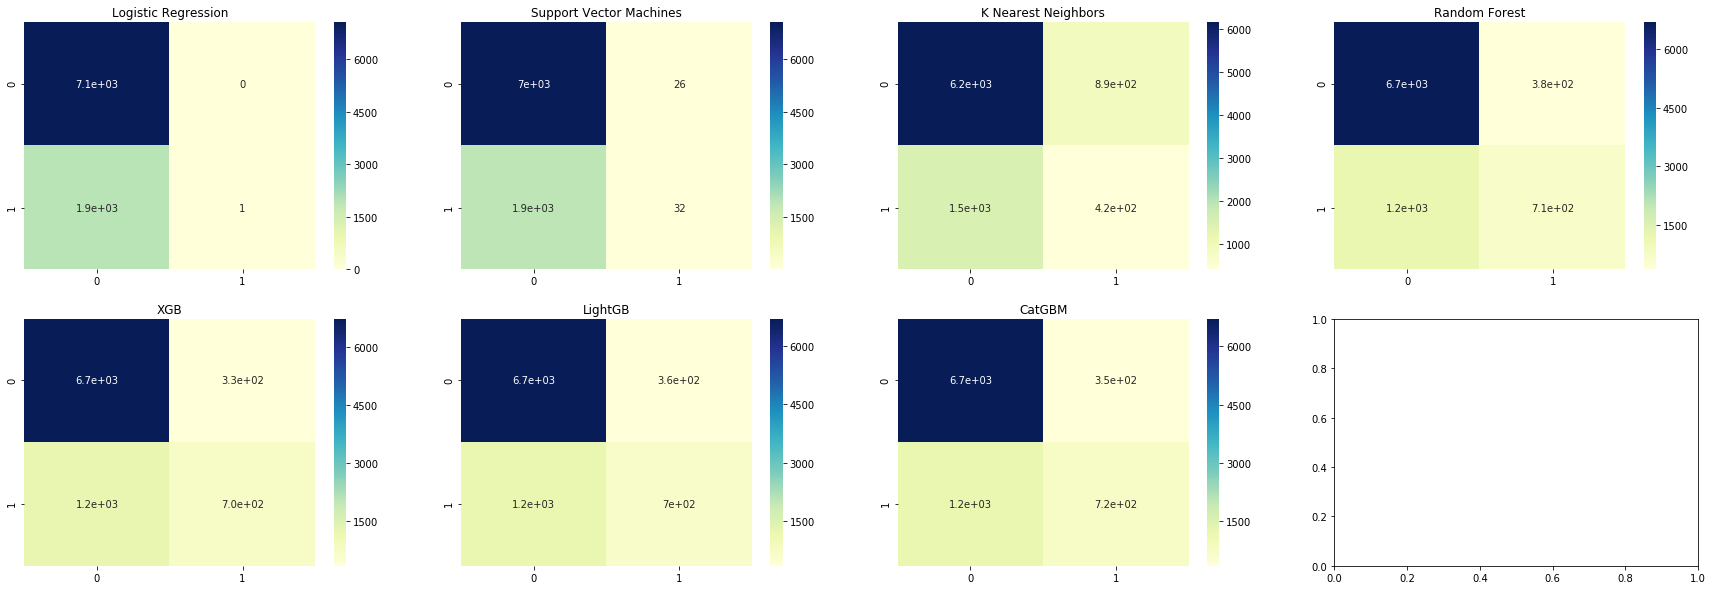

In [28]:
# Confusion Matrix
cmLR = confusion_matrix(y_test, predLR)
cmSVC = confusion_matrix(y_test, predSVC)
cmKNN = confusion_matrix(y_test, predKNN)
cmRF = confusion_matrix(y_test, predRF)
cmXGB = confusion_matrix(y_test, predXGB)
cmLGB = confusion_matrix(y_test, predLGB)
cmCB = confusion_matrix(y_test, predCB)

# Confusion Matrix List
cmList = [cmLR, cmSVC,cmKNN, cmRF, cmXGB, cmLGB, cmCB]
cmTitle = ['Logistic Regression','Support Vector Machines','K Nearest Neighbors','Random Forest','XGB','LightGB','CatGBM',None]
i = 0
plt.figure()
fig, ax = plt.subplots(2,4, num = 6, figsize = (30,10))
for cm in cmList:
    i += 1
    plt.subplot(2,4,i)
    plt.title(cmTitle[i-1])
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.show();

From above confusion matrices, it is observed:
* Logistic Regression has no false positive, but most false negative. It is overfitting.
* Ensemble models perform better than others in true positive.
* It depends on the cost of event ( Cost of False Positive & Cost of False Negative) to further choose which gradient boosting model will be selected for further work

# Parameter Tuning for CatBoost

In [76]:
# Try different learning rate
lr = [0.01, 0.1, 0.2, 0.5, 0.8]
metric_list = ['Accuracy','Precision_Score','Recall_Score','F1','ROC_AUC']
result = pd.DataFrame(0,index = np.arange(len(lr)), columns=['Learning_Rate','Metric','Value'])
result['Learning_Rate'] = lr

for l in lr:
    clf = CatBoostClassifier(iterations = 100,
                           learning_rate = l,
                           depth = 5,
                           eval_metric = 'AUC',
                           random_seed = 0).fit(x_train,y_train)
    pred = clf.predict(x_test)
    # Cross Validation
    result['Accuracy'] = cross_val_score(clfCB, x_test, y_test, cv = 10).mean()
    # Precision Score
    result['Precision_Score'] = precision_score(y_test, predCB)
    # Recall Score
    result['Recall_Score'] = recall_score(y_test, predCB)
    # F1 Score
    result['F1'] = f1_score(y_test, predCB)
    # ROC_AUC
    result['ROC_AUC'] = roc_auc_score(y_test, predCB)

0:	total: 27.6ms	remaining: 2.73s
1:	total: 56.2ms	remaining: 2.75s
2:	total: 84ms	remaining: 2.72s
3:	total: 111ms	remaining: 2.66s
4:	total: 139ms	remaining: 2.64s
5:	total: 169ms	remaining: 2.65s
6:	total: 196ms	remaining: 2.6s
7:	total: 224ms	remaining: 2.58s
8:	total: 270ms	remaining: 2.73s
9:	total: 297ms	remaining: 2.67s
10:	total: 325ms	remaining: 2.63s
11:	total: 354ms	remaining: 2.6s
12:	total: 386ms	remaining: 2.58s
13:	total: 428ms	remaining: 2.63s
14:	total: 465ms	remaining: 2.63s
15:	total: 522ms	remaining: 2.74s
16:	total: 562ms	remaining: 2.75s
17:	total: 601ms	remaining: 2.73s
18:	total: 635ms	remaining: 2.71s
19:	total: 666ms	remaining: 2.66s
20:	total: 693ms	remaining: 2.61s
21:	total: 720ms	remaining: 2.55s
22:	total: 763ms	remaining: 2.55s
23:	total: 794ms	remaining: 2.51s
24:	total: 822ms	remaining: 2.46s
25:	total: 857ms	remaining: 2.44s
26:	total: 893ms	remaining: 2.42s
27:	total: 926ms	remaining: 2.38s
28:	total: 960ms	remaining: 2.35s
29:	total: 1.01s	remainin

48:	total: 1.75s	remaining: 1.82s
49:	total: 1.77s	remaining: 1.77s
50:	total: 1.79s	remaining: 1.72s
51:	total: 1.81s	remaining: 1.68s
52:	total: 1.83s	remaining: 1.63s
53:	total: 1.85s	remaining: 1.58s
54:	total: 1.88s	remaining: 1.53s
55:	total: 1.9s	remaining: 1.49s
56:	total: 1.97s	remaining: 1.49s
57:	total: 2.03s	remaining: 1.47s
58:	total: 2.04s	remaining: 1.42s
59:	total: 2.1s	remaining: 1.4s
60:	total: 2.12s	remaining: 1.35s
61:	total: 2.14s	remaining: 1.31s
62:	total: 2.16s	remaining: 1.27s
63:	total: 2.19s	remaining: 1.23s
64:	total: 2.21s	remaining: 1.19s
65:	total: 2.25s	remaining: 1.16s
66:	total: 2.31s	remaining: 1.14s
67:	total: 2.33s	remaining: 1.1s
68:	total: 2.35s	remaining: 1.05s
69:	total: 2.37s	remaining: 1.01s
70:	total: 2.39s	remaining: 975ms
71:	total: 2.41s	remaining: 938ms
72:	total: 2.43s	remaining: 900ms
73:	total: 2.46s	remaining: 864ms
74:	total: 2.48s	remaining: 827ms
75:	total: 2.5s	remaining: 791ms
76:	total: 2.52s	remaining: 754ms
77:	total: 2.54s	re

94:	total: 3.5s	remaining: 184ms
95:	total: 3.56s	remaining: 148ms
96:	total: 3.59s	remaining: 111ms
97:	total: 3.61s	remaining: 73.7ms
98:	total: 3.64s	remaining: 36.8ms
99:	total: 3.66s	remaining: 0us
0:	total: 23.3ms	remaining: 2.3s
1:	total: 46.2ms	remaining: 2.26s
2:	total: 69.3ms	remaining: 2.24s
3:	total: 94.8ms	remaining: 2.27s
4:	total: 118ms	remaining: 2.25s
5:	total: 142ms	remaining: 2.22s
6:	total: 166ms	remaining: 2.2s
7:	total: 188ms	remaining: 2.16s
8:	total: 212ms	remaining: 2.15s
9:	total: 242ms	remaining: 2.18s
10:	total: 268ms	remaining: 2.16s
11:	total: 288ms	remaining: 2.11s
12:	total: 313ms	remaining: 2.1s
13:	total: 335ms	remaining: 2.06s
14:	total: 356ms	remaining: 2.02s
15:	total: 413ms	remaining: 2.17s
16:	total: 451ms	remaining: 2.2s
17:	total: 475ms	remaining: 2.16s
18:	total: 501ms	remaining: 2.13s
19:	total: 523ms	remaining: 2.09s
20:	total: 544ms	remaining: 2.05s
21:	total: 565ms	remaining: 2s
22:	total: 590ms	remaining: 1.98s
23:	total: 613ms	remaining: 

37:	total: 905ms	remaining: 1.48s
38:	total: 926ms	remaining: 1.45s
39:	total: 987ms	remaining: 1.48s
40:	total: 1.05s	remaining: 1.51s
41:	total: 1.08s	remaining: 1.5s
42:	total: 1.1s	remaining: 1.47s
43:	total: 1.13s	remaining: 1.44s
44:	total: 1.16s	remaining: 1.41s
45:	total: 1.18s	remaining: 1.38s
46:	total: 1.2s	remaining: 1.35s
47:	total: 1.23s	remaining: 1.33s
48:	total: 1.26s	remaining: 1.31s
49:	total: 1.3s	remaining: 1.3s
50:	total: 1.34s	remaining: 1.28s
51:	total: 1.36s	remaining: 1.26s
52:	total: 1.39s	remaining: 1.23s
53:	total: 1.41s	remaining: 1.2s
54:	total: 1.43s	remaining: 1.17s
55:	total: 1.45s	remaining: 1.14s
56:	total: 1.47s	remaining: 1.11s
57:	total: 1.5s	remaining: 1.09s
58:	total: 1.52s	remaining: 1.06s
59:	total: 1.55s	remaining: 1.03s
60:	total: 1.57s	remaining: 1.01s
61:	total: 1.6s	remaining: 981ms
62:	total: 1.62s	remaining: 954ms
63:	total: 1.65s	remaining: 926ms
64:	total: 1.67s	remaining: 897ms
65:	total: 1.7s	remaining: 874ms
66:	total: 1.75s	remain

86:	total: 2.38s	remaining: 356ms
87:	total: 2.4s	remaining: 328ms
88:	total: 2.43s	remaining: 300ms
89:	total: 2.47s	remaining: 274ms
90:	total: 2.53s	remaining: 251ms
91:	total: 2.6s	remaining: 227ms
92:	total: 2.67s	remaining: 201ms
93:	total: 2.74s	remaining: 175ms
94:	total: 2.8s	remaining: 147ms
95:	total: 2.83s	remaining: 118ms
96:	total: 2.85s	remaining: 88.2ms
97:	total: 2.87s	remaining: 58.6ms
98:	total: 2.89s	remaining: 29.2ms
99:	total: 2.91s	remaining: 0us
0:	total: 20.9ms	remaining: 2.06s
1:	total: 46ms	remaining: 2.25s
2:	total: 69.8ms	remaining: 2.25s
3:	total: 92ms	remaining: 2.21s
4:	total: 114ms	remaining: 2.17s
5:	total: 134ms	remaining: 2.1s
6:	total: 157ms	remaining: 2.08s
7:	total: 174ms	remaining: 2s
8:	total: 198ms	remaining: 2s
9:	total: 219ms	remaining: 1.97s
10:	total: 240ms	remaining: 1.94s
11:	total: 271ms	remaining: 1.99s
12:	total: 291ms	remaining: 1.95s
13:	total: 312ms	remaining: 1.92s
14:	total: 333ms	remaining: 1.89s
15:	total: 355ms	remaining: 1.86s

38:	total: 977ms	remaining: 1.53s
39:	total: 1.04s	remaining: 1.56s
40:	total: 1.06s	remaining: 1.53s
41:	total: 1.08s	remaining: 1.5s
42:	total: 1.1s	remaining: 1.47s
43:	total: 1.13s	remaining: 1.43s
44:	total: 1.15s	remaining: 1.4s
45:	total: 1.17s	remaining: 1.37s
46:	total: 1.2s	remaining: 1.35s
47:	total: 1.22s	remaining: 1.32s
48:	total: 1.24s	remaining: 1.29s
49:	total: 1.26s	remaining: 1.26s
50:	total: 1.28s	remaining: 1.23s
51:	total: 1.31s	remaining: 1.21s
52:	total: 1.32s	remaining: 1.18s
53:	total: 1.35s	remaining: 1.15s
54:	total: 1.37s	remaining: 1.12s
55:	total: 1.39s	remaining: 1.09s
56:	total: 1.42s	remaining: 1.07s
57:	total: 1.44s	remaining: 1.04s
58:	total: 1.46s	remaining: 1.01s
59:	total: 1.48s	remaining: 989ms
60:	total: 1.5s	remaining: 961ms
61:	total: 1.52s	remaining: 933ms
62:	total: 1.54s	remaining: 907ms
63:	total: 1.57s	remaining: 881ms
64:	total: 1.59s	remaining: 855ms
65:	total: 1.61s	remaining: 829ms
66:	total: 1.64s	remaining: 808ms
67:	total: 1.66s	re

88:	total: 2.32s	remaining: 287ms
89:	total: 2.35s	remaining: 261ms
90:	total: 2.37s	remaining: 234ms
91:	total: 2.39s	remaining: 208ms
92:	total: 2.41s	remaining: 181ms
93:	total: 2.44s	remaining: 155ms
94:	total: 2.46s	remaining: 129ms
95:	total: 2.48s	remaining: 103ms
96:	total: 2.5s	remaining: 77.3ms
97:	total: 2.53s	remaining: 51.6ms
98:	total: 2.56s	remaining: 25.9ms
99:	total: 2.58s	remaining: 0us
0:	total: 22.4ms	remaining: 2.22s
1:	total: 45.8ms	remaining: 2.24s
2:	total: 69.4ms	remaining: 2.24s
3:	total: 95.1ms	remaining: 2.28s
4:	total: 115ms	remaining: 2.18s
5:	total: 136ms	remaining: 2.13s
6:	total: 155ms	remaining: 2.06s
7:	total: 174ms	remaining: 2s
8:	total: 194ms	remaining: 1.96s
9:	total: 214ms	remaining: 1.93s
10:	total: 237ms	remaining: 1.92s
11:	total: 258ms	remaining: 1.89s
12:	total: 288ms	remaining: 1.93s
13:	total: 311ms	remaining: 1.91s
14:	total: 333ms	remaining: 1.89s
15:	total: 353ms	remaining: 1.85s
16:	total: 375ms	remaining: 1.83s
17:	total: 396ms	remain

37:	total: 954ms	remaining: 1.56s
38:	total: 1.02s	remaining: 1.59s
39:	total: 1.07s	remaining: 1.6s
40:	total: 1.1s	remaining: 1.58s
41:	total: 1.12s	remaining: 1.54s
42:	total: 1.14s	remaining: 1.51s
43:	total: 1.17s	remaining: 1.49s
44:	total: 1.19s	remaining: 1.46s
45:	total: 1.22s	remaining: 1.43s
46:	total: 1.24s	remaining: 1.4s
47:	total: 1.27s	remaining: 1.38s
48:	total: 1.3s	remaining: 1.35s
49:	total: 1.32s	remaining: 1.32s
50:	total: 1.35s	remaining: 1.29s
51:	total: 1.37s	remaining: 1.26s
52:	total: 1.4s	remaining: 1.24s
53:	total: 1.42s	remaining: 1.21s
54:	total: 1.44s	remaining: 1.18s
55:	total: 1.47s	remaining: 1.15s
56:	total: 1.49s	remaining: 1.13s
57:	total: 1.51s	remaining: 1.1s
58:	total: 1.54s	remaining: 1.07s
59:	total: 1.56s	remaining: 1.04s
60:	total: 1.59s	remaining: 1.02s
61:	total: 1.61s	remaining: 989ms
62:	total: 1.63s	remaining: 960ms
63:	total: 1.66s	remaining: 931ms
64:	total: 1.68s	remaining: 905ms
65:	total: 1.7s	remaining: 877ms
66:	total: 1.72s	rema

85:	total: 2.23s	remaining: 363ms
86:	total: 2.26s	remaining: 337ms
87:	total: 2.28s	remaining: 311ms
88:	total: 2.3s	remaining: 284ms
89:	total: 2.32s	remaining: 258ms
90:	total: 2.35s	remaining: 232ms
91:	total: 2.37s	remaining: 206ms
92:	total: 2.39s	remaining: 180ms
93:	total: 2.45s	remaining: 157ms
94:	total: 2.48s	remaining: 131ms
95:	total: 2.5s	remaining: 104ms
96:	total: 2.52s	remaining: 78ms
97:	total: 2.55s	remaining: 52ms
98:	total: 2.59s	remaining: 26.2ms
99:	total: 2.66s	remaining: 0us
0:	total: 66.4ms	remaining: 6.57s
1:	total: 105ms	remaining: 5.15s
2:	total: 177ms	remaining: 5.71s
3:	total: 235ms	remaining: 5.65s
4:	total: 255ms	remaining: 4.84s
5:	total: 278ms	remaining: 4.35s
6:	total: 304ms	remaining: 4.04s
7:	total: 327ms	remaining: 3.76s
8:	total: 349ms	remaining: 3.53s
9:	total: 368ms	remaining: 3.31s
10:	total: 401ms	remaining: 3.24s
11:	total: 425ms	remaining: 3.12s
12:	total: 449ms	remaining: 3s
13:	total: 469ms	remaining: 2.88s
14:	total: 494ms	remaining: 2.8

32:	total: 1.44s	remaining: 2.91s
33:	total: 1.49s	remaining: 2.9s
34:	total: 1.52s	remaining: 2.82s
35:	total: 1.55s	remaining: 2.75s
36:	total: 1.57s	remaining: 2.68s
37:	total: 1.67s	remaining: 2.73s
38:	total: 1.75s	remaining: 2.74s
39:	total: 1.83s	remaining: 2.74s
40:	total: 1.86s	remaining: 2.67s
41:	total: 1.9s	remaining: 2.62s
42:	total: 1.92s	remaining: 2.55s
43:	total: 1.95s	remaining: 2.48s
44:	total: 1.98s	remaining: 2.42s
45:	total: 2.01s	remaining: 2.36s
46:	total: 2.04s	remaining: 2.29s
47:	total: 2.06s	remaining: 2.23s
48:	total: 2.09s	remaining: 2.17s
49:	total: 2.12s	remaining: 2.12s
50:	total: 2.15s	remaining: 2.06s
51:	total: 2.18s	remaining: 2.01s
52:	total: 2.21s	remaining: 1.96s
53:	total: 2.29s	remaining: 1.95s
54:	total: 2.32s	remaining: 1.9s
55:	total: 2.39s	remaining: 1.88s
56:	total: 2.41s	remaining: 1.82s
57:	total: 2.44s	remaining: 1.77s
58:	total: 2.47s	remaining: 1.71s
59:	total: 2.5s	remaining: 1.67s
60:	total: 2.53s	remaining: 1.62s
61:	total: 2.56s	r

76:	total: 2.61s	remaining: 779ms
77:	total: 2.67s	remaining: 753ms
78:	total: 2.72s	remaining: 724ms
79:	total: 2.79s	remaining: 698ms
80:	total: 2.84s	remaining: 666ms
81:	total: 2.86s	remaining: 628ms
82:	total: 2.9s	remaining: 594ms
83:	total: 2.92s	remaining: 556ms
84:	total: 2.94s	remaining: 519ms
85:	total: 2.96s	remaining: 483ms
86:	total: 2.99s	remaining: 447ms
87:	total: 3.01s	remaining: 411ms
88:	total: 3.03s	remaining: 375ms
89:	total: 3.06s	remaining: 340ms
90:	total: 3.09s	remaining: 305ms
91:	total: 3.11s	remaining: 270ms
92:	total: 3.13s	remaining: 236ms
93:	total: 3.15s	remaining: 201ms
94:	total: 3.18s	remaining: 167ms
95:	total: 3.2s	remaining: 133ms
96:	total: 3.22s	remaining: 99.7ms
97:	total: 3.25s	remaining: 66.3ms
98:	total: 3.28s	remaining: 33.1ms
99:	total: 3.3s	remaining: 0us
0:	total: 34.3ms	remaining: 3.4s
1:	total: 54.6ms	remaining: 2.68s
2:	total: 78.2ms	remaining: 2.53s
3:	total: 104ms	remaining: 2.48s
4:	total: 133ms	remaining: 2.52s
5:	total: 154ms	rem

24:	total: 706ms	remaining: 2.12s
25:	total: 773ms	remaining: 2.2s
26:	total: 806ms	remaining: 2.18s
27:	total: 827ms	remaining: 2.13s
28:	total: 856ms	remaining: 2.1s
29:	total: 877ms	remaining: 2.04s
30:	total: 898ms	remaining: 2s
31:	total: 935ms	remaining: 1.99s
32:	total: 1s	remaining: 2.03s
33:	total: 1.08s	remaining: 2.09s
34:	total: 1.1s	remaining: 2.04s
35:	total: 1.13s	remaining: 2.01s
36:	total: 1.16s	remaining: 1.98s
37:	total: 1.19s	remaining: 1.93s
38:	total: 1.21s	remaining: 1.89s
39:	total: 1.23s	remaining: 1.84s
40:	total: 1.25s	remaining: 1.8s
41:	total: 1.27s	remaining: 1.76s
42:	total: 1.3s	remaining: 1.73s
43:	total: 1.34s	remaining: 1.7s
44:	total: 1.41s	remaining: 1.73s
45:	total: 1.48s	remaining: 1.74s
46:	total: 1.55s	remaining: 1.75s
47:	total: 1.61s	remaining: 1.74s
48:	total: 1.64s	remaining: 1.71s
49:	total: 1.71s	remaining: 1.71s
50:	total: 1.75s	remaining: 1.68s
51:	total: 1.77s	remaining: 1.64s
52:	total: 1.79s	remaining: 1.59s
53:	total: 1.81s	remaining

68:	total: 2.07s	remaining: 932ms
69:	total: 2.15s	remaining: 922ms
70:	total: 2.19s	remaining: 895ms
71:	total: 2.21s	remaining: 862ms
72:	total: 2.28s	remaining: 844ms
73:	total: 2.33s	remaining: 819ms
74:	total: 2.35s	remaining: 784ms
75:	total: 2.41s	remaining: 762ms
76:	total: 2.44s	remaining: 728ms
77:	total: 2.46s	remaining: 694ms
78:	total: 2.48s	remaining: 659ms
79:	total: 2.51s	remaining: 628ms
80:	total: 2.54s	remaining: 595ms
81:	total: 2.56s	remaining: 561ms
82:	total: 2.58s	remaining: 528ms
83:	total: 2.6s	remaining: 495ms
84:	total: 2.62s	remaining: 463ms
85:	total: 2.65s	remaining: 431ms
86:	total: 2.67s	remaining: 399ms
87:	total: 2.69s	remaining: 367ms
88:	total: 2.72s	remaining: 337ms
89:	total: 2.74s	remaining: 305ms
90:	total: 2.77s	remaining: 274ms
91:	total: 2.79s	remaining: 243ms
92:	total: 2.81s	remaining: 211ms
93:	total: 2.83s	remaining: 181ms
94:	total: 2.85s	remaining: 150ms
95:	total: 2.87s	remaining: 120ms
96:	total: 2.9s	remaining: 89.6ms
97:	total: 2.92

17:	total: 810ms	remaining: 3.69s
18:	total: 831ms	remaining: 3.54s
19:	total: 852ms	remaining: 3.41s
20:	total: 879ms	remaining: 3.31s
21:	total: 903ms	remaining: 3.2s
22:	total: 985ms	remaining: 3.3s
23:	total: 1.03s	remaining: 3.26s
24:	total: 1.05s	remaining: 3.16s
25:	total: 1.08s	remaining: 3.07s
26:	total: 1.1s	remaining: 2.98s
27:	total: 1.13s	remaining: 2.89s
28:	total: 1.15s	remaining: 2.81s
29:	total: 1.17s	remaining: 2.74s
30:	total: 1.2s	remaining: 2.66s
31:	total: 1.22s	remaining: 2.59s
32:	total: 1.24s	remaining: 2.52s
33:	total: 1.27s	remaining: 2.47s
34:	total: 1.33s	remaining: 2.47s
35:	total: 1.4s	remaining: 2.49s
36:	total: 1.44s	remaining: 2.45s
37:	total: 1.47s	remaining: 2.4s
38:	total: 1.49s	remaining: 2.34s
39:	total: 1.51s	remaining: 2.27s
40:	total: 1.53s	remaining: 2.21s
41:	total: 1.56s	remaining: 2.15s
42:	total: 1.58s	remaining: 2.1s
43:	total: 1.61s	remaining: 2.04s
44:	total: 1.63s	remaining: 1.99s
45:	total: 1.65s	remaining: 1.93s
46:	total: 1.67s	rema

60:	total: 1.62s	remaining: 1.04s
61:	total: 1.64s	remaining: 1.01s
62:	total: 1.66s	remaining: 976ms
63:	total: 1.68s	remaining: 946ms
64:	total: 1.7s	remaining: 917ms
65:	total: 1.72s	remaining: 888ms
66:	total: 1.74s	remaining: 859ms
67:	total: 1.76s	remaining: 830ms
68:	total: 1.78s	remaining: 801ms
69:	total: 1.8s	remaining: 774ms
70:	total: 1.83s	remaining: 749ms
71:	total: 1.86s	remaining: 724ms
72:	total: 1.88s	remaining: 696ms
73:	total: 1.91s	remaining: 670ms
74:	total: 1.93s	remaining: 642ms
75:	total: 1.95s	remaining: 615ms
76:	total: 1.97s	remaining: 588ms
77:	total: 1.99s	remaining: 561ms
78:	total: 2.01s	remaining: 535ms
79:	total: 2.03s	remaining: 508ms
80:	total: 2.07s	remaining: 485ms
81:	total: 2.09s	remaining: 458ms
82:	total: 2.11s	remaining: 433ms
83:	total: 2.13s	remaining: 406ms
84:	total: 2.15s	remaining: 380ms
85:	total: 2.17s	remaining: 354ms
86:	total: 2.19s	remaining: 328ms
87:	total: 2.22s	remaining: 302ms
88:	total: 2.24s	remaining: 276ms
89:	total: 2.26s

3:	total: 135ms	remaining: 3.25s
4:	total: 159ms	remaining: 3.02s
5:	total: 180ms	remaining: 2.83s
6:	total: 200ms	remaining: 2.66s
7:	total: 217ms	remaining: 2.5s
8:	total: 238ms	remaining: 2.4s
9:	total: 262ms	remaining: 2.36s
10:	total: 284ms	remaining: 2.29s
11:	total: 319ms	remaining: 2.34s
12:	total: 342ms	remaining: 2.29s
13:	total: 369ms	remaining: 2.27s
14:	total: 410ms	remaining: 2.32s
15:	total: 456ms	remaining: 2.4s
16:	total: 479ms	remaining: 2.34s
17:	total: 499ms	remaining: 2.27s
18:	total: 543ms	remaining: 2.31s
19:	total: 611ms	remaining: 2.44s
20:	total: 678ms	remaining: 2.55s
21:	total: 741ms	remaining: 2.63s
22:	total: 811ms	remaining: 2.71s
23:	total: 873ms	remaining: 2.76s
24:	total: 908ms	remaining: 2.72s
25:	total: 929ms	remaining: 2.64s
26:	total: 992ms	remaining: 2.68s
27:	total: 1.06s	remaining: 2.73s
28:	total: 1.08s	remaining: 2.65s
29:	total: 1.1s	remaining: 2.58s
30:	total: 1.13s	remaining: 2.51s
31:	total: 1.15s	remaining: 2.44s
32:	total: 1.17s	remainin

50:	total: 1.25s	remaining: 1.2s
51:	total: 1.27s	remaining: 1.17s
52:	total: 1.29s	remaining: 1.14s
53:	total: 1.34s	remaining: 1.14s
54:	total: 1.36s	remaining: 1.11s
55:	total: 1.38s	remaining: 1.09s
56:	total: 1.4s	remaining: 1.06s
57:	total: 1.42s	remaining: 1.03s
58:	total: 1.44s	remaining: 1s
59:	total: 1.47s	remaining: 983ms
60:	total: 1.5s	remaining: 957ms
61:	total: 1.52s	remaining: 929ms
62:	total: 1.54s	remaining: 902ms
63:	total: 1.56s	remaining: 877ms
64:	total: 1.58s	remaining: 850ms
65:	total: 1.6s	remaining: 824ms
66:	total: 1.62s	remaining: 797ms
67:	total: 1.64s	remaining: 771ms
68:	total: 1.67s	remaining: 751ms
69:	total: 1.7s	remaining: 729ms
70:	total: 1.72s	remaining: 702ms
71:	total: 1.74s	remaining: 677ms
72:	total: 1.76s	remaining: 651ms
73:	total: 1.78s	remaining: 626ms
74:	total: 1.8s	remaining: 601ms
75:	total: 1.82s	remaining: 575ms
76:	total: 1.84s	remaining: 550ms
77:	total: 1.86s	remaining: 526ms
78:	total: 1.88s	remaining: 501ms
79:	total: 1.91s	remain

95:	total: 2.85s	remaining: 119ms
96:	total: 2.92s	remaining: 90.5ms
97:	total: 2.96s	remaining: 60.4ms
98:	total: 2.98s	remaining: 30.1ms
99:	total: 3s	remaining: 0us
0:	total: 21.9ms	remaining: 2.17s
1:	total: 43.1ms	remaining: 2.11s
2:	total: 65.8ms	remaining: 2.13s
3:	total: 88.4ms	remaining: 2.12s
4:	total: 114ms	remaining: 2.16s
5:	total: 135ms	remaining: 2.12s
6:	total: 166ms	remaining: 2.21s
7:	total: 189ms	remaining: 2.17s
8:	total: 218ms	remaining: 2.21s
9:	total: 254ms	remaining: 2.28s
10:	total: 275ms	remaining: 2.22s
11:	total: 296ms	remaining: 2.17s
12:	total: 318ms	remaining: 2.13s
13:	total: 340ms	remaining: 2.09s
14:	total: 360ms	remaining: 2.04s
15:	total: 381ms	remaining: 2s
16:	total: 407ms	remaining: 1.99s
17:	total: 428ms	remaining: 1.95s
18:	total: 449ms	remaining: 1.91s
19:	total: 481ms	remaining: 1.92s
20:	total: 507ms	remaining: 1.91s
21:	total: 529ms	remaining: 1.87s
22:	total: 549ms	remaining: 1.84s
23:	total: 571ms	remaining: 1.81s
24:	total: 593ms	remainin

42:	total: 1.41s	remaining: 1.87s
43:	total: 1.44s	remaining: 1.83s
44:	total: 1.46s	remaining: 1.79s
45:	total: 1.49s	remaining: 1.75s
46:	total: 1.52s	remaining: 1.71s
47:	total: 1.54s	remaining: 1.67s
48:	total: 1.57s	remaining: 1.64s
49:	total: 1.6s	remaining: 1.6s
50:	total: 1.64s	remaining: 1.57s
51:	total: 1.66s	remaining: 1.53s
52:	total: 1.69s	remaining: 1.5s
53:	total: 1.72s	remaining: 1.46s
54:	total: 1.74s	remaining: 1.43s
55:	total: 1.77s	remaining: 1.39s
56:	total: 1.8s	remaining: 1.35s
57:	total: 1.82s	remaining: 1.32s
58:	total: 1.86s	remaining: 1.3s
59:	total: 1.89s	remaining: 1.26s
60:	total: 1.92s	remaining: 1.23s
61:	total: 1.95s	remaining: 1.19s
62:	total: 1.97s	remaining: 1.16s
63:	total: 2s	remaining: 1.13s
64:	total: 2.03s	remaining: 1.09s
65:	total: 2.06s	remaining: 1.06s
66:	total: 2.09s	remaining: 1.03s
67:	total: 2.12s	remaining: 997ms
68:	total: 2.15s	remaining: 964ms
69:	total: 2.17s	remaining: 931ms
70:	total: 2.2s	remaining: 897ms
71:	total: 2.22s	remain

87:	total: 2.2s	remaining: 300ms
88:	total: 2.23s	remaining: 276ms
89:	total: 2.25s	remaining: 250ms
90:	total: 2.27s	remaining: 225ms
91:	total: 2.29s	remaining: 200ms
92:	total: 2.32s	remaining: 175ms
93:	total: 2.34s	remaining: 150ms
94:	total: 2.37s	remaining: 124ms
95:	total: 2.39s	remaining: 99.4ms
96:	total: 2.42s	remaining: 74.7ms
97:	total: 2.44s	remaining: 49.8ms
98:	total: 2.46s	remaining: 24.9ms
99:	total: 2.48s	remaining: 0us
0:	total: 26.7ms	remaining: 2.65s
1:	total: 48.5ms	remaining: 2.38s
2:	total: 76.9ms	remaining: 2.49s
3:	total: 99ms	remaining: 2.38s
4:	total: 136ms	remaining: 2.59s
5:	total: 171ms	remaining: 2.68s
6:	total: 193ms	remaining: 2.56s
7:	total: 214ms	remaining: 2.46s
8:	total: 236ms	remaining: 2.38s
9:	total: 258ms	remaining: 2.32s
10:	total: 279ms	remaining: 2.26s
11:	total: 308ms	remaining: 2.26s
12:	total: 329ms	remaining: 2.2s
13:	total: 351ms	remaining: 2.16s
14:	total: 371ms	remaining: 2.1s
15:	total: 391ms	remaining: 2.05s
16:	total: 413ms	remain

35:	total: 1.08s	remaining: 1.92s
36:	total: 1.14s	remaining: 1.94s
37:	total: 1.2s	remaining: 1.96s
38:	total: 1.23s	remaining: 1.92s
39:	total: 1.25s	remaining: 1.87s
40:	total: 1.32s	remaining: 1.9s
41:	total: 1.36s	remaining: 1.87s
42:	total: 1.38s	remaining: 1.83s
43:	total: 1.43s	remaining: 1.82s
44:	total: 1.45s	remaining: 1.78s
45:	total: 1.48s	remaining: 1.73s
46:	total: 1.5s	remaining: 1.69s
47:	total: 1.53s	remaining: 1.66s
48:	total: 1.55s	remaining: 1.62s
49:	total: 1.57s	remaining: 1.57s
50:	total: 1.59s	remaining: 1.53s
51:	total: 1.61s	remaining: 1.49s
52:	total: 1.64s	remaining: 1.45s
53:	total: 1.66s	remaining: 1.41s
54:	total: 1.68s	remaining: 1.37s
55:	total: 1.7s	remaining: 1.33s
56:	total: 1.72s	remaining: 1.3s
57:	total: 1.75s	remaining: 1.27s
58:	total: 1.77s	remaining: 1.23s
59:	total: 1.79s	remaining: 1.19s
60:	total: 1.81s	remaining: 1.16s
61:	total: 1.87s	remaining: 1.15s
62:	total: 1.89s	remaining: 1.11s
63:	total: 1.91s	remaining: 1.08s
64:	total: 1.93s	re

84:	total: 2.25s	remaining: 397ms
85:	total: 2.27s	remaining: 370ms
86:	total: 2.3s	remaining: 344ms
87:	total: 2.32s	remaining: 317ms
88:	total: 2.38s	remaining: 294ms
89:	total: 2.4s	remaining: 267ms
90:	total: 2.44s	remaining: 241ms
91:	total: 2.5s	remaining: 218ms
92:	total: 2.52s	remaining: 190ms
93:	total: 2.54s	remaining: 162ms
94:	total: 2.6s	remaining: 137ms
95:	total: 2.67s	remaining: 111ms
96:	total: 2.71s	remaining: 83.8ms
97:	total: 2.73s	remaining: 55.8ms
98:	total: 2.77s	remaining: 28ms
99:	total: 2.79s	remaining: 0us
0:	total: 24.8ms	remaining: 2.46s
1:	total: 50.5ms	remaining: 2.48s
2:	total: 75.7ms	remaining: 2.45s
3:	total: 97.2ms	remaining: 2.33s
4:	total: 118ms	remaining: 2.24s
5:	total: 142ms	remaining: 2.23s
6:	total: 162ms	remaining: 2.15s
7:	total: 182ms	remaining: 2.09s
8:	total: 202ms	remaining: 2.04s
9:	total: 228ms	remaining: 2.05s
10:	total: 250ms	remaining: 2.02s
11:	total: 277ms	remaining: 2.03s
12:	total: 297ms	remaining: 1.99s
13:	total: 320ms	remainin

31:	total: 723ms	remaining: 1.54s
32:	total: 743ms	remaining: 1.51s
33:	total: 778ms	remaining: 1.51s
34:	total: 842ms	remaining: 1.56s
35:	total: 896ms	remaining: 1.59s
36:	total: 954ms	remaining: 1.62s
37:	total: 1.06s	remaining: 1.73s
38:	total: 1.12s	remaining: 1.75s
39:	total: 1.19s	remaining: 1.78s
40:	total: 1.28s	remaining: 1.84s
41:	total: 1.31s	remaining: 1.81s
42:	total: 1.33s	remaining: 1.77s
43:	total: 1.35s	remaining: 1.72s
44:	total: 1.37s	remaining: 1.68s
45:	total: 1.4s	remaining: 1.64s
46:	total: 1.42s	remaining: 1.6s
47:	total: 1.44s	remaining: 1.56s
48:	total: 1.46s	remaining: 1.52s
49:	total: 1.48s	remaining: 1.48s
50:	total: 1.5s	remaining: 1.44s
51:	total: 1.52s	remaining: 1.41s
52:	total: 1.54s	remaining: 1.37s
53:	total: 1.56s	remaining: 1.33s
54:	total: 1.59s	remaining: 1.3s
55:	total: 1.62s	remaining: 1.27s
56:	total: 1.64s	remaining: 1.23s
57:	total: 1.66s	remaining: 1.2s
58:	total: 1.68s	remaining: 1.17s
59:	total: 1.71s	remaining: 1.14s
60:	total: 1.78s	re

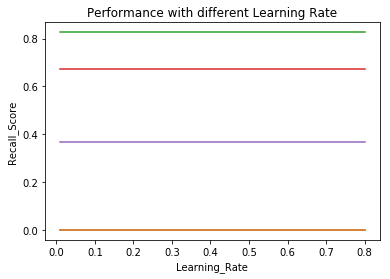

In [77]:
plt.title('Performance with different Learning Rate')
for i in result.index:
    sns.lineplot(x = 'Learning_Rate', y = result.columns[i+1], data = result)
plt.show()    

# Conclusions

* Following the machine learning pipeline, we have analyzed selected features (both predictors and target) distributions, built models and evaluated the performances of each model. 
* 7 different models are used, including logistic regression, support vector machines, K nearest neighbors, random forest, XGBoost, LightBoost and CatBoost.
* The techniques in evaluating the performances of the models are cross validation, precision score, recall score, F1 score, ROC_AUC and confusion matrix.
* Using the default parameters in all models, Gradient Boosting models outperform others, among which CatBoost has the best performance.



### FURTHER WORK
* Feature Engineering is not applied in this kernel. For real business case, it is better to communicate with different teams to figure out the best approach. After all, "there is no free lunch”.  For example, One-Hot Encoding can be used.
* The ratio of "default" vs "no default" is about 1:3 in the dataset. It may affect the accuracy of each model. There are several ways to solve it. For instance, SMOTE.
* Parameter tuning can be applied as well. For example, to leverage between different learning_rate and n_estimators combos in gradient boosting models.
* HAVE FUN.

# Reference

* Default of credit card clients dataset, https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
* Machine Learning Pipeline, https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
* Feature distribution, https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models 
* Logistic Regression, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* Support Vector Machines, https://scikit-learn.org/stable/modules/svm.html
* K Nearest Neighbors, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Random Forest Classifier, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* XGBoost, https://xgboost.readthedocs.io/en/latest/ 
* LightGBM, https://lightgbm.readthedocs.io/en/latest/Python-API.html
* CatBoost, https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/
* Cross Validation, https://www.ritchieng.com/machine-learning-cross-validation/ 
* Model Evaluation, https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation
* Accuracy & Precision & Recall & F1, https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
* Feature Importance, https://tech.yandex.com/catboost/doc/dg/features/feature-importances-calculation-docpage/
* Parameter Tuning, https://tech.yandex.com/catboost/doc/dg/concepts/parameter-tuning-docpage/
* Feature Engineering, https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63